## Vowel

In [1]:
import urllib.request as urllib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

In [3]:
train_df.describe()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,6.000000,-3.166695,1.735343,-0.448002,0.524983,-0.389280,0.584960,0.017477,0.417394,-0.268112,-0.084568
std,3.165277,0.957965,1.160970,0.741363,0.769361,0.722011,0.648547,0.479254,0.595580,0.619584,0.560317
min,1.000000,-5.211000,-1.274000,-2.487000,-1.409000,-2.127000,-0.836000,-1.537000,-1.293000,-1.613000,-1.680000
25%,3.000000,-3.923000,0.916750,-0.945500,-0.083500,-0.930750,0.108500,-0.297000,-0.018250,-0.673750,-0.507000
50%,6.000000,-3.097000,1.733000,-0.502500,0.456500,-0.417000,0.527500,0.040000,0.477000,-0.255000,-0.082500
75%,9.000000,-2.511750,2.403750,0.049250,1.164000,0.115500,1.009750,0.348000,0.861250,0.137500,0.301000
max,11.000000,-0.941000,5.074000,1.413000,2.191000,1.831000,2.327000,1.403000,1.673000,1.309000,1.396000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3eda38d630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3ed6ead2e8>]], dtype=object)

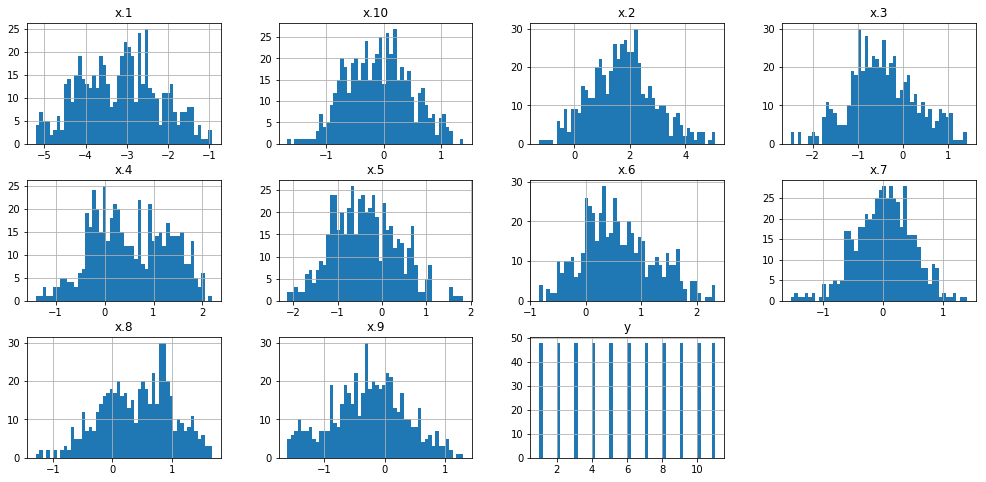

In [4]:
train_df.hist(layout=(3,4), figsize=(17,8), bins=50)

In [5]:
from sklearn.preprocessing import StandardScaler
X = train_df.loc[:,'x.1':'x.10'].values
y = train_df.loc[:,'y'].values
Scaler = StandardScaler().fit(X)
X_std = Scaler.transform(X)

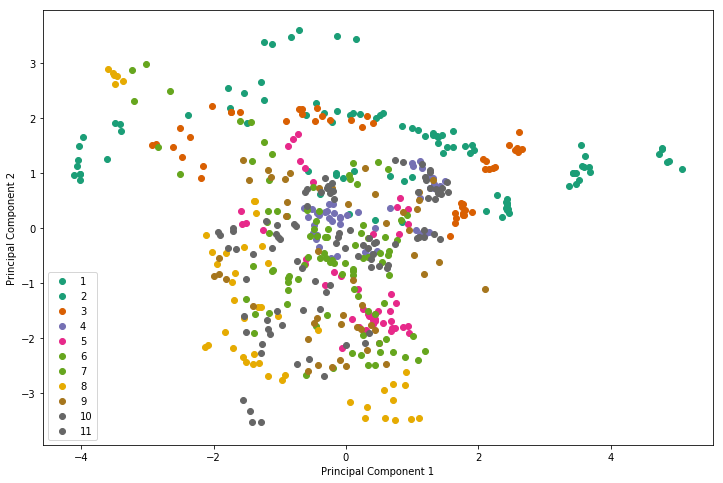

In [6]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('Dark2')
mclasses= np.arange(y.min(), y.max() + 1)
mcolors = np.array([cmap(i) for i in np.linspace(0,1,mclasses.size)])
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(fancybox=True)
plt.show()

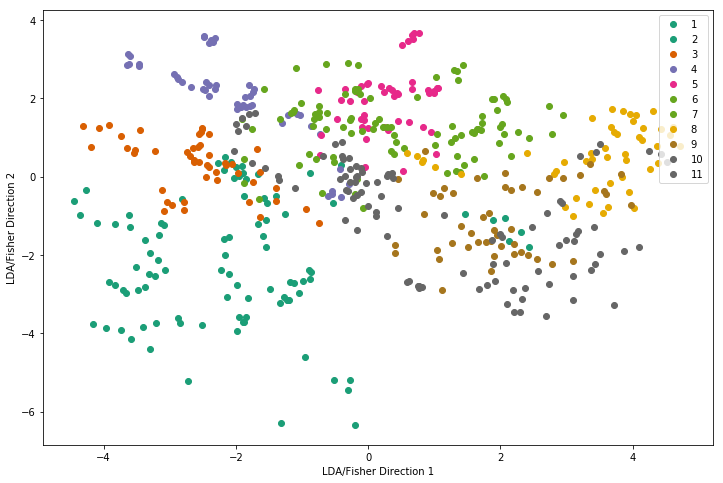

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('Dark2')
mclasses= np.arange(y.min(), y.max() + 1)
mcolors = np.array([cmap(i) for i in np.linspace(0,1,mclasses.size)])
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,
c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

In [8]:
def stupid_classifier(x):
    return np.ceil(np.random.uniform(0,11))
stupid_classifier = np.vectorize(stupid_classifier, signature="(n)->()")

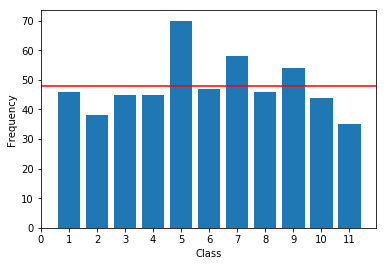

In [9]:
import scipy.stats as stats
f, ax = plt.subplots(1)
y_hat = stupid_classifier(X)
fq = stats.itemfreq(y_hat)
ax.bar(fq[:,0], fq[:,1])
ax.set_xticks(np.arange(0,12))
ax.axhline(y=fq[:,1].mean(), xmin=0, xmax=12, color="r")
ax.set_ylabel("Frequency")
ax.set_xlabel("Class")

-----LDA-----
0.683712121212
0.443722943723
-----QDA-----
0.988636363636
0.471861471861
-----KNN-----


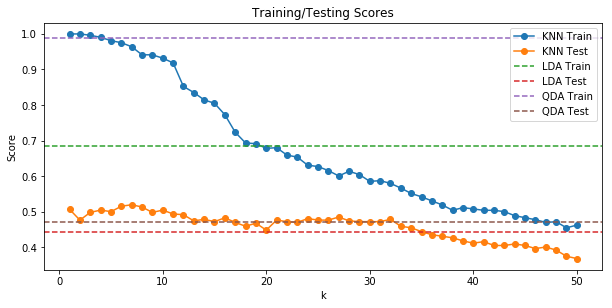

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier

Xtest = test_df.loc[:,'x.1':'x.10'].values
ytest = test_df.loc[:,'y'].values
X_std_test = Scaler.transform(Xtest)
lda_model = LDA()
lda_model.fit(X_std,y)
print("-----LDA-----")
print(lda_model.score(X_std,y))
print(lda_model.score(X_std_test,ytest))
qda_model = QDA()
qda_model.fit(X_std,y)
print("-----QDA-----")
print(qda_model.score(X_std,y))
print(qda_model.score(X_std_test,ytest))
print("-----KNN-----")
knn_scores_training = []
knn_scores_testing = []
k = range(1,51)
for c in k:
    knn_model = KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(X_std,y)
    knn_scores_training.append(knn_model.score(X_std,y))
    knn_scores_testing.append(knn_model.score(X_std_test,ytest))
plt.figure(figsize=(10,10))
ax = plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing Scores")
ax.plot(k,knn_scores_training, '-o', label="KNN Train") 
ax.plot(k,knn_scores_testing, '-o', label="KNN Test")
ax.axhline(y=lda_model.score(X_std,y), label="LDA Train", linestyle="--", color="C2")
ax.axhline(y=lda_model.score(X_std_test,ytest), label="LDA Test", linestyle="--", color="C3")
ax.axhline(y=qda_model.score(X_std,y), label="QDA Train", linestyle="--", color="C4")
ax.axhline(y=qda_model.score(X_std_test,ytest), label="QDA Test", linestyle="--", color="C5")
plt.legend(loc = "upper right")
plt.show()

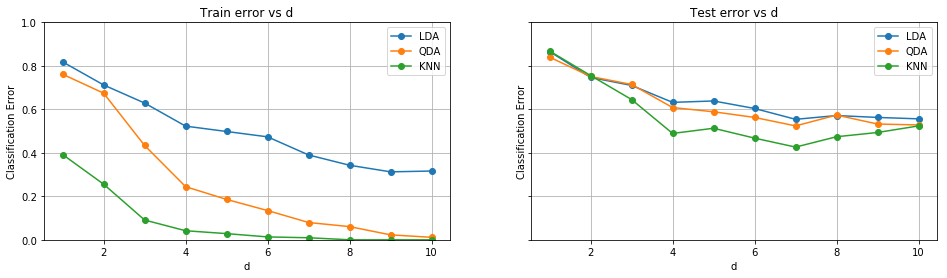

In [20]:
train_errors = []
test_errors = []
for d in range(1,11):
    pca = PCA(n_components=d)
    x_red_train = pca.fit_transform(X_std)
    x_red_test = pca.transform(X_std_test)
    lda_model = LDA()
    qda_model = QDA()
    knn_model = KNeighborsClassifier(n_neighbors=2)
    lda_model.fit(x_red_train, y)
    qda_model.fit(x_red_train, y)
    knn_model.fit(x_red_train, y)
    train_errors.append([1 - lda_model.score(x_red_train, y), 
                         1 - qda_model.score(x_red_train, y), 
                         1 - knn_model.score(x_red_train, y)])
    test_errors.append([1 - lda_model.score(x_red_test, ytest), 
                         1 - qda_model.score(x_red_test, ytest), 
                         1 - knn_model.score(x_red_test, ytest)])
f, axes = plt.subplots(1, 2, sharey=True)
f.set_size_inches(16,4)
axes[0].plot(np.arange(1,11), train_errors, '-o')
axes[0].grid(True)
axes[0].set_ylim([0,1])
axes[0].set_xlabel("d")
axes[0].set_ylabel("Classification Error")
axes[0].set_title("Train error vs d")
axes[0].legend(["LDA", "QDA", "KNN"])
axes[1].plot(np.arange(1,11), test_errors, '-o')
axes[1].grid(True)
axes[1].legend(["LDA", "QDA", "KNN"])
axes[1].set_xlabel("d")
axes[1].set_ylabel("Classification Error")
axes[1].set_title("Test error vs d")

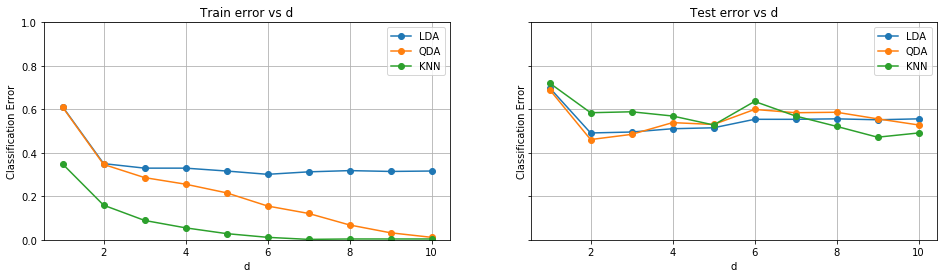

In [19]:
train_errors = []
test_errors = []
for d in range(1,11):
    lda = LDA(n_components=d)
    x_red_train = lda.fit_transform(X_std, y)
    x_red_test = lda.transform(X_std_test)
    lda_model = LDA()
    qda_model = QDA()
    knn_model = KNeighborsClassifier(n_neighbors=2)
    lda_model.fit(x_red_train, y)
    qda_model.fit(x_red_train, y)
    knn_model.fit(x_red_train, y)
    train_errors.append([1 - lda_model.score(x_red_train, y), 
                         1 - qda_model.score(x_red_train, y), 
                         1 - knn_model.score(x_red_train, y)])
    test_errors.append([1 - lda_model.score(x_red_test, ytest), 
                         1 - qda_model.score(x_red_test, ytest), 
                         1 - knn_model.score(x_red_test, ytest)])
f, axes = plt.subplots(1, 2, sharey=True)
f.set_size_inches(16,4)
axes[0].plot(np.arange(1,11), train_errors, '-o')
axes[0].grid(True)
axes[0].set_ylim([0,1])
axes[0].set_xlabel("d")
axes[0].set_ylabel("Classification Error")
axes[0].set_title("Train error vs d")
axes[0].legend(["LDA", "QDA", "KNN"])
axes[1].plot(np.arange(1,11), test_errors, '-o')
axes[1].grid(True)
axes[1].legend(["LDA", "QDA", "KNN"])
axes[1].set_xlabel("d")
axes[1].set_ylabel("Classification Error")
axes[1].set_title("Test error vs d")